In [1]:
import pandas as pd
import numpy as np

1. TREINO
2. VALIDAÇÃO 
3. TESTE

In [2]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0


In [37]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train['Sex_binario'] = train['Sex'].map(transformar_sexo)
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

variaveis = ['Sex_binario', 'Age']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold  

Creating a vector named "X_falso", to show the split function 

In [6]:
X_falso = np.arange(10)
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Showing the split function from sklearn

In [7]:
np.random.seed(0)
train_test_split(X_falso, test_size = 0.5)

[array([6, 7, 3, 0, 5]), array([2, 8, 4, 9, 1])]

In [8]:
np.random.seed(1)
X_treino, X_valid, y_treino, y_valid = train_test_split(X, y, test_size = 0.5)

In [9]:
X_treino.head()

,Sex_binario,Age
394,1,24.00
851,0,74.00
373,0,22.00
523,1,44.00
78,0,0.83


In [10]:
X_treino.shape, X_valid.shape, y_treino.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [11]:
modelo = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
modelo.fit(X_treino, y_treino)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [12]:
p = modelo.predict(X_valid)

In [13]:
np.mean(y_valid == p)

0.7466367713004485

In [14]:
p = (X_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)


0.7623318385650224

 Validação Cruzada

In [15]:
X_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [16]:
from sklearn.model_selection import KFold

In [17]:
kf = KFold(3, shuffle=True, random_state=0)
for linhas_treino, linhas_valid in kf.split(X_falso):
    print("Treino", linhas_treino)
    print("Valid", linhas_valid)
    print()

Treino [0 1 3 5 6 7]
Valid [2 4 8 9]

Treino [0 2 3 4 5 8 9]
Valid [1 6 7]

Treino [1 2 4 6 7 8 9]
Valid [0 3 5]



In [18]:
# resultados = []
# for rep in range(10):
#     print("Rep:", rep)

#     kf = KFold(2, shuffle=True, random_state=rep)
    
#     for linhas_treino, linhas_valid in kf.split(X):
#         print("Treino", linhas_treino.shape[0])
#         print("Valid", linhas_valid.shape[0])
#         print()

#         X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
#         y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
#         #print(X_treino.head())
#         #print()

#         modelo = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
#         modelo.fit(X_treino, y_treino)

#         p = modelo.predict(X_valid)

#         acc = np.mean(y_valid == p)
#         resultados.append(acc)
#         print("Acc:", acc)
#         print()

In [20]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino", linhas_treino.shape[0])
    print("Valid", linhas_valid.shape[0])
    print()

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    #print(X_treino.head())
    #print()

    modelo = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()

Treino 445
Valid 446

Acc: 0.7511210762331838

Treino 446
Valid 445

Acc: 0.7617977528089888

Treino 445
Valid 446

Acc: 0.7533632286995515

Treino 446
Valid 445

Acc: 0.7595505617977528

Treino 445
Valid 446

Acc: 0.7690582959641256

Treino 446
Valid 445

Acc: 0.7573033707865169

Treino 445
Valid 446

Acc: 0.7399103139013453

Treino 446
Valid 445

Acc: 0.7595505617977528

Treino 445
Valid 446

Acc: 0.7354260089686099

Treino 446
Valid 445

Acc: 0.797752808988764

Treino 445
Valid 446

Acc: 0.7690582959641256

Treino 446
Valid 445

Acc: 0.7640449438202247

Treino 445
Valid 446

Acc: 0.7757847533632287

Treino 446
Valid 445

Acc: 0.7573033707865169

Treino 445
Valid 446

Acc: 0.7556053811659192

Treino 446
Valid 445

Acc: 0.7640449438202247

Treino 445
Valid 446

Acc: 0.7443946188340808

Treino 446
Valid 445

Acc: 0.7595505617977528

Treino 445
Valid 446

Acc: 0.7533632286995515

Treino 446
Valid 445

Acc: 0.7640449438202247



In [23]:
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [25]:
np.mean(resultados)

0.759601451100922

(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

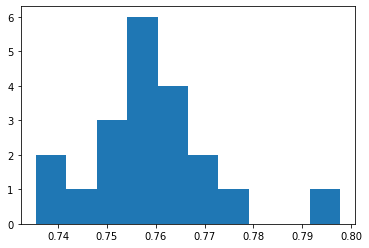

In [24]:
pylab.hist(resultados)

### Novas variáveis

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [38]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [39]:
X = train[variaveis].fillna(-1)
y = train["Survived"]

In [31]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino", linhas_treino.shape[0])
    print("Valid", linhas_valid.shape[0])
    print()

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]
    #print(X_treino.head())
    #print()

    modelo = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()

Treino 445
Valid 446

Acc: 0.7869955156950673

Treino 446
Valid 445

Acc: 0.7797752808988764

Treino 445
Valid 446

Acc: 0.827354260089686

Treino 446
Valid 445

Acc: 0.8179775280898877

Treino 445
Valid 446

Acc: 0.7847533632286996

Treino 446
Valid 445

Acc: 0.7842696629213484

Treino 445
Valid 446

Acc: 0.8161434977578476

Treino 446
Valid 445

Acc: 0.7842696629213484

Treino 445
Valid 446

Acc: 0.8004484304932735

Treino 446
Valid 445

Acc: 0.8

Treino 445
Valid 446

Acc: 0.8183856502242153

Treino 446
Valid 445

Acc: 0.802247191011236

Treino 445
Valid 446

Acc: 0.8116591928251121

Treino 446
Valid 445

Acc: 0.8067415730337079

Treino 445
Valid 446

Acc: 0.820627802690583

Treino 446
Valid 445

Acc: 0.7887640449438202

Treino 445
Valid 446

Acc: 0.8385650224215246

Treino 446
Valid 445

Acc: 0.8044943820224719

Treino 445
Valid 446

Acc: 0.7982062780269058

Treino 446
Valid 445

Acc: 0.8112359550561797



In [32]:
np.mean(resultados)

0.8041457147175896

(array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
 array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
        0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
        0.83856502]),
 <BarContainer object of 10 artists>)

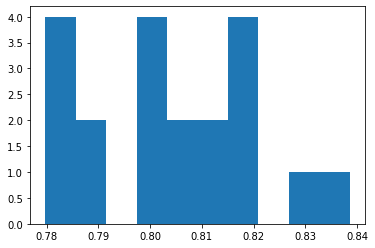

In [33]:
pylab.hist(resultados)

# Retreinar o modelo 

In [35]:
X.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [36]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
test[variaveis].head()

,Sex_binario,Age,Pclass,SibSp,Parch,Fare
0,0,34.5,3,0,0,7.8292
1,1,47.0,3,1,0,7.0000
2,0,62.0,2,0,0,9.6875
3,0,27.0,3,0,0,8.6625
4,1,22.0,3,1,1,12.2875


In [41]:
modelo = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 0)
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

In [42]:
p

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Criar Submission

In [43]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [44]:
sub.to_csv('modelo_video5.csv', header = True)

In [45]:
!head -n10 modelo_video5.csv

PassengerId,Survived
892,0
893,0
894,1
895,1
896,0
897,0
898,0
899,0
900,1
